Output for a stored 1 is 00100 0100 0100 0100 0100 0100 0100 0000


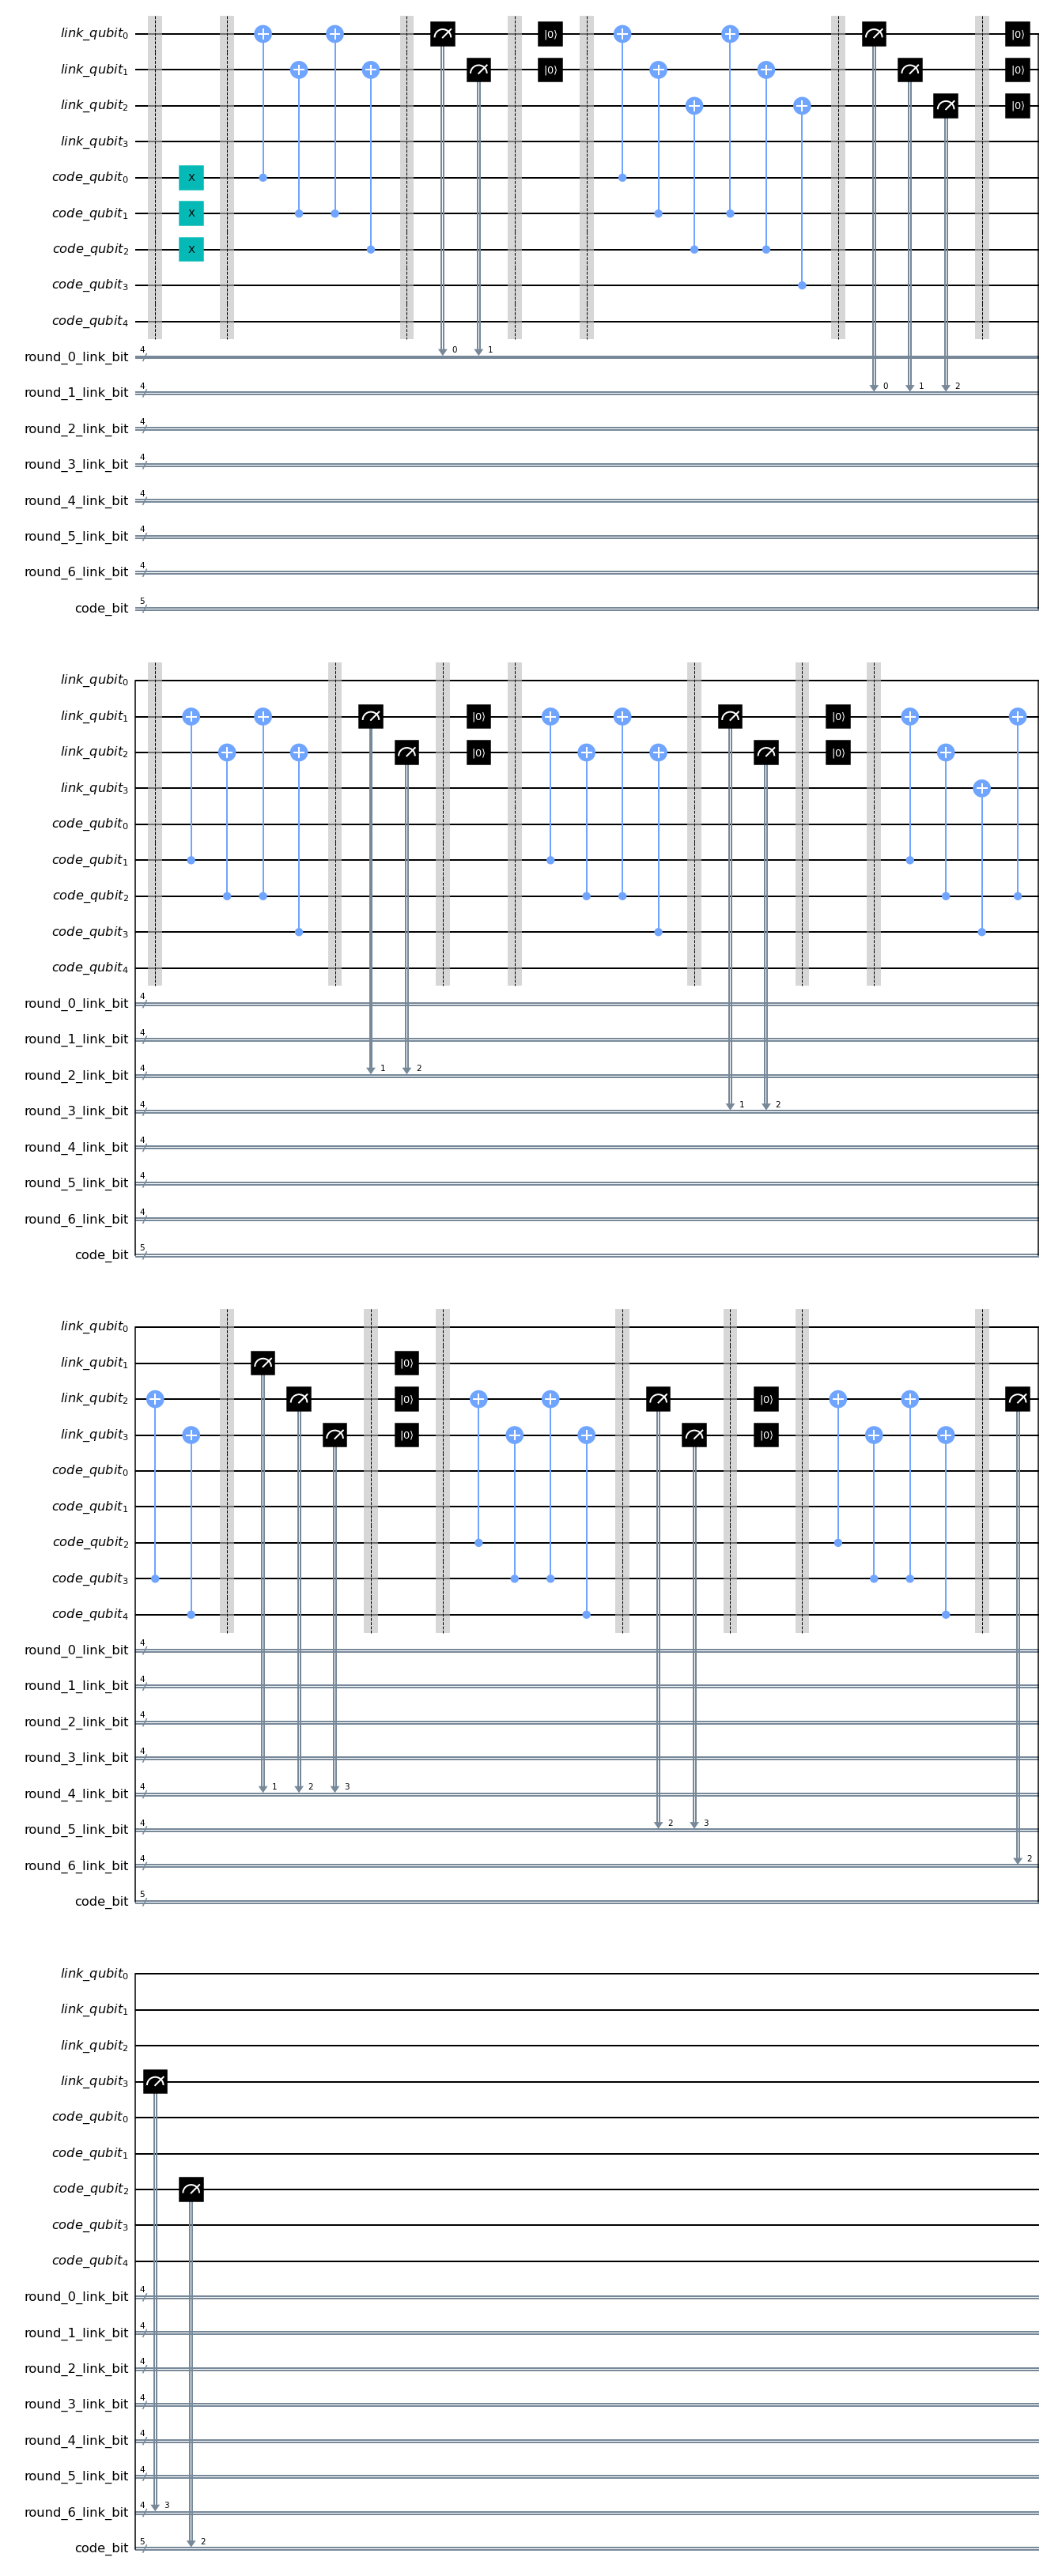

In [12]:
from qiskit import Aer
from qiskit_qec.circuits.repetition_code import RepetitionCodeCircuit
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
backend_sim = Aer.get_backend('qasm_simulator')
d = 3
dx = 2
code = RepetitionCodeCircuit(d, dx=dx, xbasis=False, resets=True, barriers=True)

qc = code.circuit["1"]
job = backend_sim.run(qc)
counts = job.result().get_counts()
output = list(counts.keys())[0]
print('Output for a stored',1,'is',output)
qc.draw(output='mpl')

In [2]:
print(counts)

{'00100 0000 0100 0000 0100 0000 0100 0000': 1024}


Output for a stored 1 is 00100 1100 1100 1100 0100 0100 0100 0000


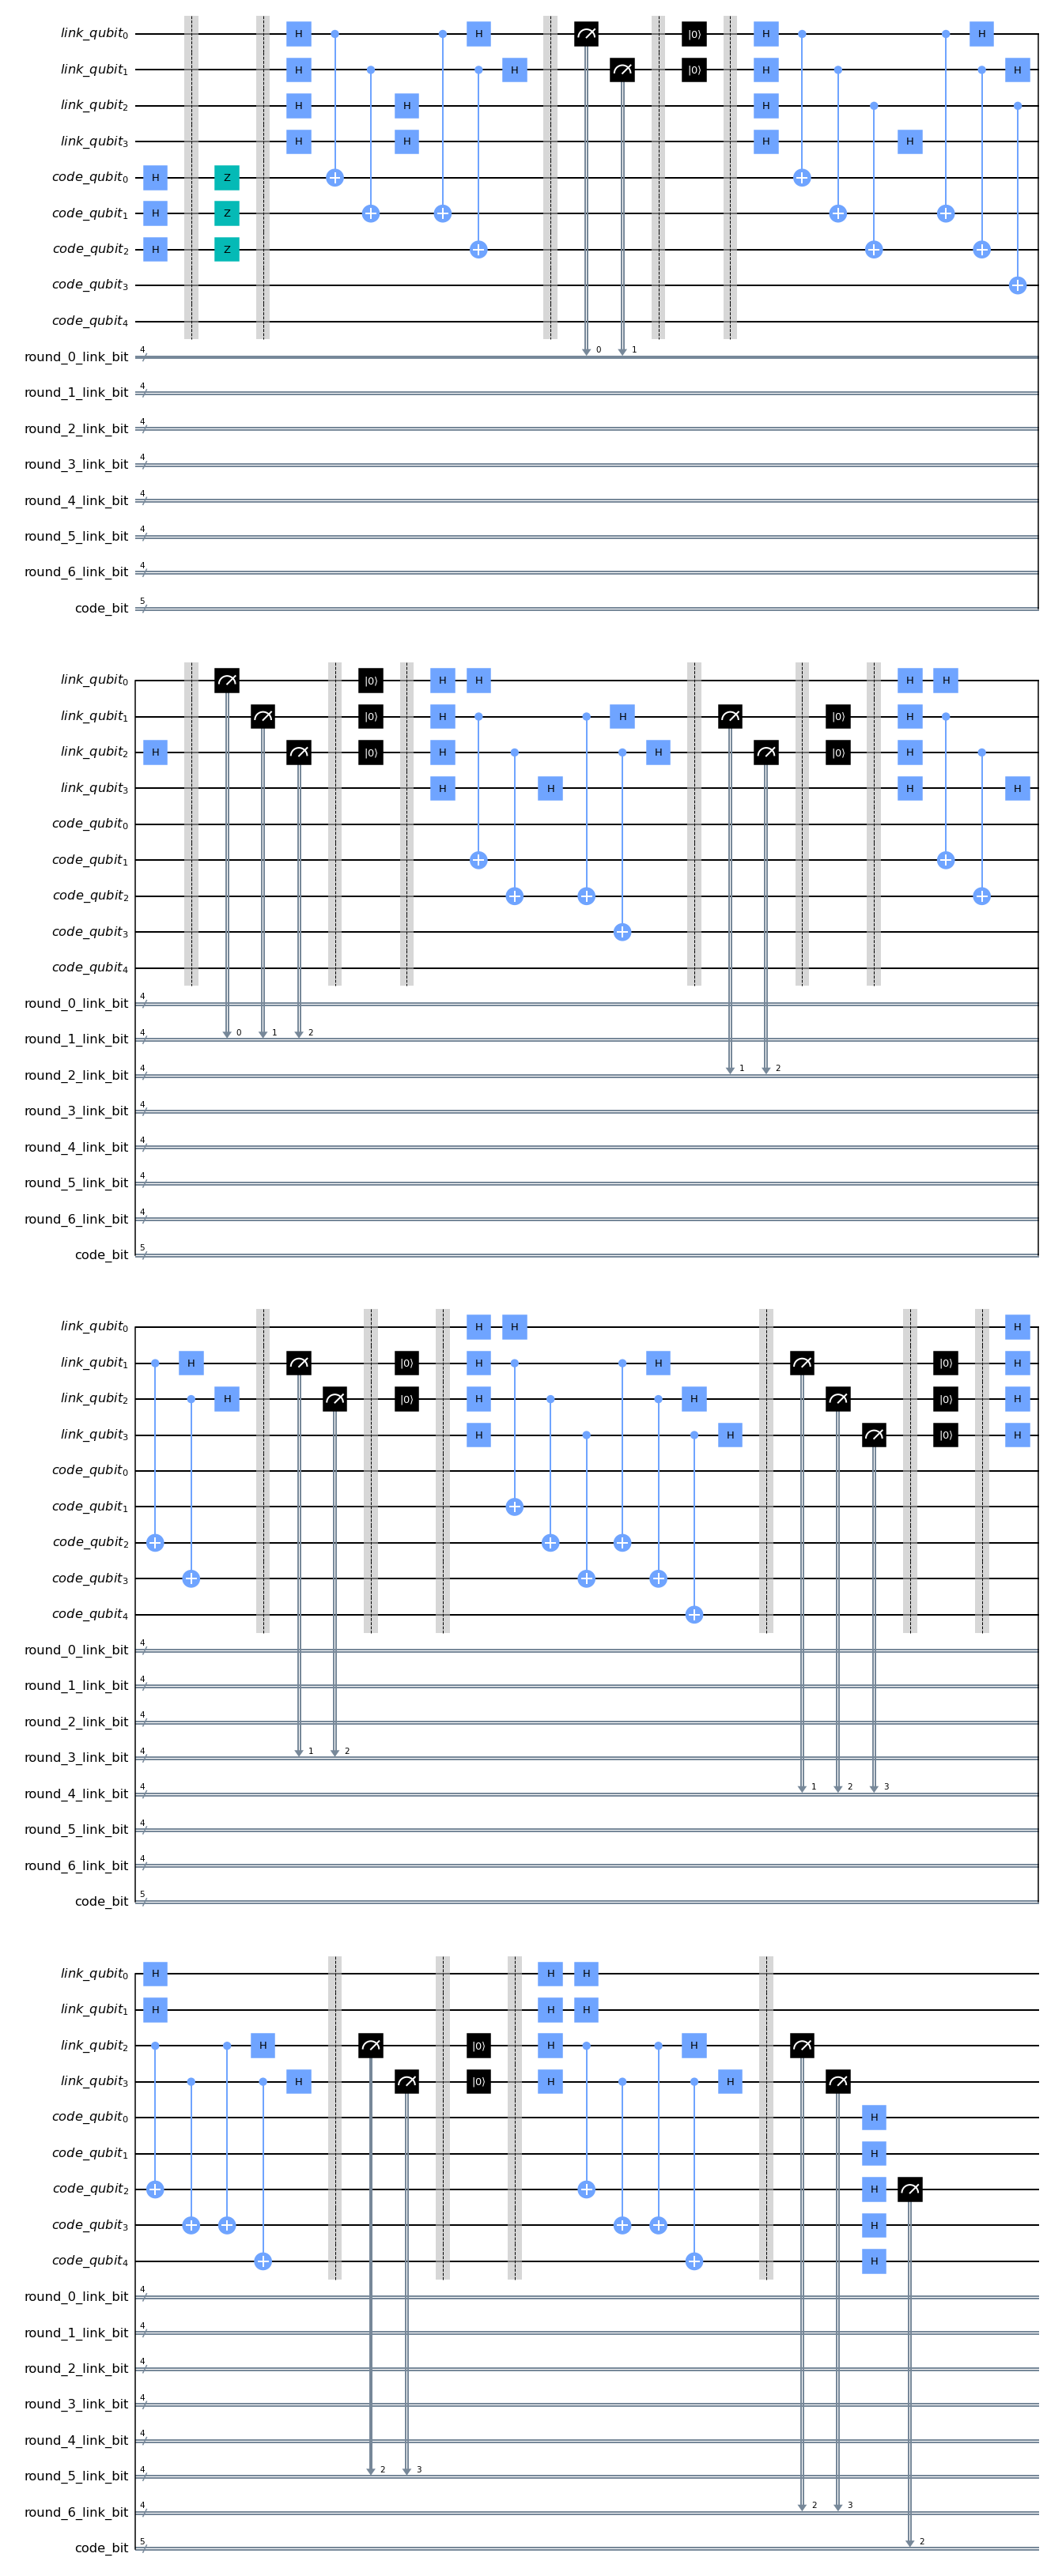

In [20]:
code = RepetitionCodeCircuit(d, dx=dx, xbasis=True, resets=True, barriers=True)

qc = code.circuit["1"]
job = backend_sim.run(qc)
counts = job.result().get_counts()
output = list(counts.keys())[0]
print('Output for a stored',1,'is',output)
qc.draw(output='mpl')

Output for a stored 1 is 0100 0001


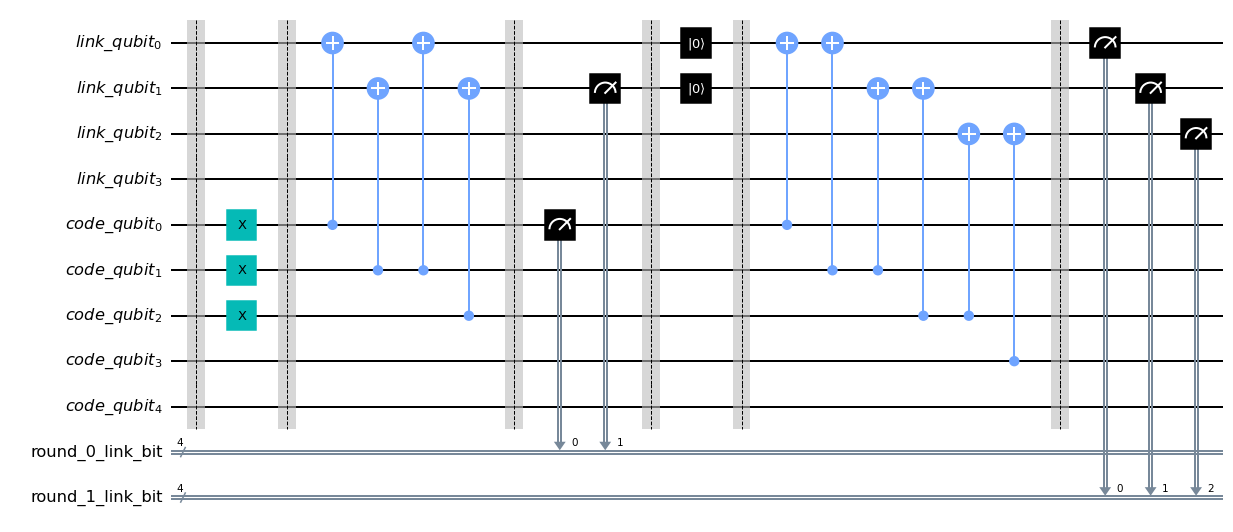

In [17]:
d = 3
dx = 2 
code_qubit = QuantumRegister(d + dx, "code_qubit")
link_qubit = QuantumRegister((d - 1) + dx, "link_qubit")
code_bit = ClassicalRegister(d + dx, "code_bit")
link_bits = []
baby = QuantumCircuit(link_qubit, code_qubit, name="baby")

baby.barrier()
baby.x(code_qubit[:d])
baby.barrier()


baby.cx(code_qubit[0], link_qubit[0])
baby.cx(code_qubit[1], link_qubit[1])
baby.cx(code_qubit[1], link_qubit[0])
baby.cx(code_qubit[2], link_qubit[1])

i = 0
link_bits.append(
            ClassicalRegister(d - 1 +  dx, "round_" + str( 0) + "_link_bit")
        )
baby.add_register(link_bits[-1])
baby.barrier()
baby.measure( code_qubit[0], link_bits[0][0])
baby.measure(link_qubit[1], link_bits[0][1])
baby.barrier()
baby.reset(link_qubit[:2])
baby.barrier()

baby.cx(code_qubit[0], link_qubit[0])
baby.cx(code_qubit[1], link_qubit[0])

baby.cx(code_qubit[1], link_qubit[1])
baby.cx(code_qubit[2], link_qubit[1])

baby.cx(code_qubit[2], link_qubit[2])
baby.cx(code_qubit[3], link_qubit[2])
baby.barrier()


link_bits.append(
            ClassicalRegister(d - 1 +  dx, "round_" + str( 1) + "_link_bit")
        )
baby.add_register(link_bits[-1])
baby.measure(link_qubit[0], link_bits[1][0])
baby.measure(link_qubit[1], link_bits[1][1])
baby.measure(link_qubit[2], link_bits[1][2])



babyjob = backend_sim.run(baby)
babycounts = babyjob.result().get_counts()
babyoutput = list(babycounts.keys())[0]
print('Output for a stored',1,'is',babyoutput)

baby.draw(output='mpl')

